<a href="https://colab.research.google.com/github/Meghavika/AI-Driven-Analysis-Between-Clinical-Parameters-and-Menopause/blob/main/AI_Driven_Interrelationship_Analysis_Between_Clinical_Parameters_and_Menopause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Menopause_Chettinad.csv']))
df.head()

Saving Menopause_Chettinad.csv to Menopause_Chettinad.csv


,SNo,AGE,LMP,OBESITY,CVD,MI,TP,PCOS,HYPERTENSION,DIABETES,...,TSH,FT4,HDL,TG,HOT FLASHES,SWEAT,MOOD SWINGS,FATIGUE,SEVERITY,RECOMMENDATION
0,1,50,10-03-2017,NO,NO,NO,NO,NO,YES,NO,...,3.0,2.2,88,118,NO,YES,NO,NO,MODERATE,Lifestyle modification
1,2,55,13-07-2016,NO,NO,NO,NO,NO,YES,NO,...,4.0,2.2,62,108,NO,YES,NO,NO,MILD,Lifestyle modification
2,3,55,13-03-2016,NO,NO,NO,NO,NO,YES,NO,...,2.0,1.4,76,108,NO,YES,NO,NO,MILD,Lifestyle modification
3,4,54,25-03-2016,NO,NO,NO,NO,NO,YES,NO,...,2.0,1.6,80,120,NO,NO,YES,NO,MODERATE,Lifestyle modification
4,5,55,02-09-2015,NO,NO,NO,NO,NO,YES,NO,...,2.0,1.2,76,134,NO,YES,NO,NO,MODERATE,Lifestyle modification


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             135 non-null    int64  
 1   AGE             135 non-null    int64  
 2   LMP             135 non-null    object 
 3   OBESITY         135 non-null    object 
 4   CVD             135 non-null    object 
 5   MI              135 non-null    object 
 6   TP              135 non-null    object 
 7   PCOS            135 non-null    object 
 8   HYPERTENSION    135 non-null    object 
 9   DIABETES        135 non-null    object 
 10  HEIGHT          135 non-null    int64  
 11  WEIGHT          135 non-null    int64  
 12  BMI             135 non-null    float64
 13  HB              135 non-null    float64
 14  FSH             135 non-null    float64
 15  ESTROGEN        135 non-null    float64
 16  PROGESTERONE    135 non-null    float64
 17  VITAMIN D       135 non-null    int

,SNo,AGE,HEIGHT,WEIGHT,BMI,HB,FSH,ESTROGEN,PROGESTERONE,VITAMIN D,...,HEART RATE,SBP,DBP,PROLACTIN,LH,GNRH,TSH,FT4,HDL,TG
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,68.000000,48.333333,155.762963,65.325926,26.274815,14.083778,8.592593,269.619259,20.675556,58.881481,...,84.503704,136.444444,85.333333,17.475556,30.454815,8.540741,2.931111,3.597778,95.177778,102.029630
std,39.115214,10.826998,9.503501,10.978833,3.206424,15.424966,4.448757,140.061095,9.644436,7.328183,...,6.918366,17.511901,8.085365,7.946251,21.132170,11.701360,1.449110,4.938449,22.049086,18.801374
min,1.000000,19.000000,127.000000,40.000000,20.800000,8.900000,2.000000,80.000000,2.500000,32.000000,...,67.000000,100.000000,60.000000,2.000000,1.600000,0.000000,0.200000,0.200000,46.000000,70.000000
25%,34.500000,48.000000,150.000000,60.000000,24.000000,11.500000,6.000000,191.000000,18.000000,54.000000,...,80.000000,120.000000,80.000000,13.000000,16.000000,4.000000,2.000000,1.800000,72.000000,90.000000
50%,68.000000,50.000000,158.000000,64.000000,26.000000,12.300000,8.200000,280.000000,20.000000,60.000000,...,84.000000,140.000000,90.000000,20.000000,20.800000,6.000000,3.000000,2.000000,92.000000,100.000000
75%,101.500000,53.000000,160.000000,70.000000,28.300000,13.000000,12.000000,310.000000,22.000000,63.000000,...,90.000000,150.000000,90.000000,23.600000,40.100000,8.000000,3.000000,2.300000,116.000000,117.000000
max,135.000000,80.000000,180.000000,98.000000,35.000000,142.000000,16.600000,800.000000,120.000000,72.000000,...,104.000000,180.000000,120.000000,27.000000,161.000000,81.000000,10.000000,20.000000,180.000000,162.000000


In [ ]:
for column in df.columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-3-fc44823e5acf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-3-fc44823e5acf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [ ]:
#Removing Outliers
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# for numeric columns only
numeric_df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) |(numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# normalization of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_df = df.select_dtypes(include=['number']) #numeric columns only
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns) #scaling

In [ ]:
df.to_csv('Menopause_Chettinad_cleaned.csv', index=False)
print(df.head())

   SNo  AGE         LMP OBESITY CVD  MI  TP PCOS HYPERTENSION DIABETES  ...  \
0    1   50  10-03-2017      NO  NO  NO  NO   NO          YES       NO  ...   
1    2   55  13-07-2016      NO  NO  NO  NO   NO          YES       NO  ...   
2    3   55  13-03-2016      NO  NO  NO  NO   NO          YES       NO  ...   
3    4   54  25-03-2016      NO  NO  NO  NO   NO          YES       NO  ...   
4    5   55  02-09-2015      NO  NO  NO  NO   NO          YES       NO  ...   

   TSH  FT4  HDL   TG  HOT FLASHES  SWEAT  MOOD SWINGS  FATIGUE  SEVERITY  \
0  3.0  2.2   88  118           NO    YES           NO       NO  MODERATE   
1  4.0  2.2   62  108           NO    YES           NO       NO      MILD   
2  2.0  1.4   76  108           NO    YES           NO       NO      MILD   
3  2.0  1.6   80  120           NO     NO          YES       NO  MODERATE   
4  2.0  1.2   76  134           NO    YES           NO       NO  MODERATE   

           RECOMMENDATION  
0  Lifestyle modification  
1  Lif

In [ ]:
import pandas as pd
cleaned_df = pd.read_csv('Menopause_Chettinad_cleaned.csv')
cleaned_df.head()
cleaned_df.info()
cleaned_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             135 non-null    int64  
 1   AGE             135 non-null    int64  
 2   LMP             135 non-null    object 
 3   OBESITY         135 non-null    object 
 4   CVD             135 non-null    object 
 5   MI              135 non-null    object 
 6   TP              135 non-null    object 
 7   PCOS            135 non-null    object 
 8   HYPERTENSION    135 non-null    object 
 9   DIABETES        135 non-null    object 
 10  HEIGHT          135 non-null    int64  
 11  WEIGHT          135 non-null    int64  
 12  BMI             135 non-null    float64
 13  HB              135 non-null    float64
 14  FSH             135 non-null    float64
 15  ESTROGEN        135 non-null    float64
 16  PROGESTERONE    135 non-null    float64
 17  VITAMIN D       135 non-null    int

,SNo,AGE,HEIGHT,WEIGHT,BMI,HB,FSH,ESTROGEN,PROGESTERONE,VITAMIN D,...,HEART RATE,SBP,DBP,PROLACTIN,LH,GNRH,TSH,FT4,HDL,TG
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,68.000000,48.333333,155.762963,65.325926,26.274815,14.083778,8.592593,269.619259,20.675556,58.881481,...,84.503704,136.444444,85.333333,17.475556,30.454815,8.540741,2.931111,3.597778,95.177778,102.029630
std,39.115214,10.826998,9.503501,10.978833,3.206424,15.424966,4.448757,140.061095,9.644436,7.328183,...,6.918366,17.511901,8.085365,7.946251,21.132170,11.701360,1.449110,4.938449,22.049086,18.801374
min,1.000000,19.000000,127.000000,40.000000,20.800000,8.900000,2.000000,80.000000,2.500000,32.000000,...,67.000000,100.000000,60.000000,2.000000,1.600000,0.000000,0.200000,0.200000,46.000000,70.000000
25%,34.500000,48.000000,150.000000,60.000000,24.000000,11.500000,6.000000,191.000000,18.000000,54.000000,...,80.000000,120.000000,80.000000,13.000000,16.000000,4.000000,2.000000,1.800000,72.000000,90.000000
50%,68.000000,50.000000,158.000000,64.000000,26.000000,12.300000,8.200000,280.000000,20.000000,60.000000,...,84.000000,140.000000,90.000000,20.000000,20.800000,6.000000,3.000000,2.000000,92.000000,100.000000
75%,101.500000,53.000000,160.000000,70.000000,28.300000,13.000000,12.000000,310.000000,22.000000,63.000000,...,90.000000,150.000000,90.000000,23.600000,40.100000,8.000000,3.000000,2.300000,116.000000,117.000000
max,135.000000,80.000000,180.000000,98.000000,35.000000,142.000000,16.600000,800.000000,120.000000,72.000000,...,104.000000,180.000000,120.000000,27.000000,161.000000,81.000000,10.000000,20.000000,180.000000,162.000000


In [ ]:
# If you want to download the cleaned CSV file
from google.colab import files
files.download('Menopause_Chettinad_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cleaned_df.drop('LMP', axis=1, inplace=True)
cleaned_df.drop('RECOMMENDATION', axis=1, inplace=True)
cleaned_df.drop('SNo', axis=1, inplace=True)
cleaned_df.head()

,AGE,OBESITY,CVD,MI,TP,PCOS,HYPERTENSION,DIABETES,HEIGHT,WEIGHT,...,GNRH,TSH,FT4,HDL,TG,HOT FLASHES,SWEAT,MOOD SWINGS,FATIGUE,SEVERITY
0,50,NO,NO,NO,NO,NO,YES,NO,151,63,...,3,3.0,2.2,88,118,NO,YES,NO,NO,MODERATE
1,55,NO,NO,NO,NO,NO,YES,NO,160,77,...,6,4.0,2.2,62,108,NO,YES,NO,NO,MILD
2,55,NO,NO,NO,NO,NO,YES,NO,145,65,...,4,2.0,1.4,76,108,NO,YES,NO,NO,MILD
3,54,NO,NO,NO,NO,NO,YES,NO,147,65,...,8,2.0,1.6,80,120,NO,NO,YES,NO,MODERATE
4,55,NO,NO,NO,NO,NO,YES,NO,145,63,...,8,2.0,1.2,76,134,NO,YES,NO,NO,MODERATE


In [ ]:
severity_mapping = {'MILD': 0, 'MODERATE': 1, 'SEVERE': 2}
cleaned_df['SEVERITY'] = cleaned_df['SEVERITY'].map(severity_mapping)
print(cleaned_df)

     AGE OBESITY CVD  MI  TP PCOS HYPERTENSION DIABETES  HEIGHT  WEIGHT  ...  \
0     50      NO  NO  NO  NO   NO          YES       NO     151      63  ...   
1     55      NO  NO  NO  NO   NO          YES       NO     160      77  ...   
2     55      NO  NO  NO  NO   NO          YES       NO     145      65  ...   
3     54      NO  NO  NO  NO   NO          YES       NO     147      65  ...   
4     55      NO  NO  NO  NO   NO          YES       NO     145      63  ...   
..   ...     ...  ..  ..  ..  ...          ...      ...     ...     ...  ...   
130   53      NO  NO  NO  NO   NO          YES      YES     170      60  ...   
131   51      NO  NO  NO  NO   NO          YES       NO     180      90  ...   
132   50     YES  NO  NO  NO   NO           NO       NO     180      90  ...   
133   52      NO  NO  NO  NO   NO           NO      YES     178      85  ...   
134   50     YES  NO  NO  NO   NO           NO       NO     168      85  ...   

     GNRH  TSH  FT4  HDL   TG  HOT FLAS

In [ ]:
mapping_yes_no = {'YES': 1, 'NO': 0}
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        cleaned_df[column] = cleaned_df[column].map(mapping_yes_no)

print(cleaned_df.head())

   AGE  OBESITY  CVD  MI  TP  PCOS  HYPERTENSION  DIABETES  HEIGHT  WEIGHT  \
0   50        0    0   0   0     0             1         0     151      63   
1   55        0    0   0   0     0             1         0     160      77   
2   55        0    0   0   0     0             1         0     145      65   
3   54        0    0   0   0     0             1         0     147      65   
4   55        0    0   0   0     0             1         0     145      63   

   ...  GNRH  TSH  FT4  HDL   TG  HOT FLASHES  SWEAT  MOOD SWINGS  FATIGUE  \
0  ...     3  3.0  2.2   88  118            0      1            0        0   
1  ...     6  4.0  2.2   62  108            0      1            0        0   
2  ...     4  2.0  1.4   76  108            0      1            0        0   
3  ...     8  2.0  1.6   80  120            0      0            1        0   
4  ...     8  2.0  1.2   76  134            0      1            0        0   

   SEVERITY  
0         1  
1         0  
2         0  
3     

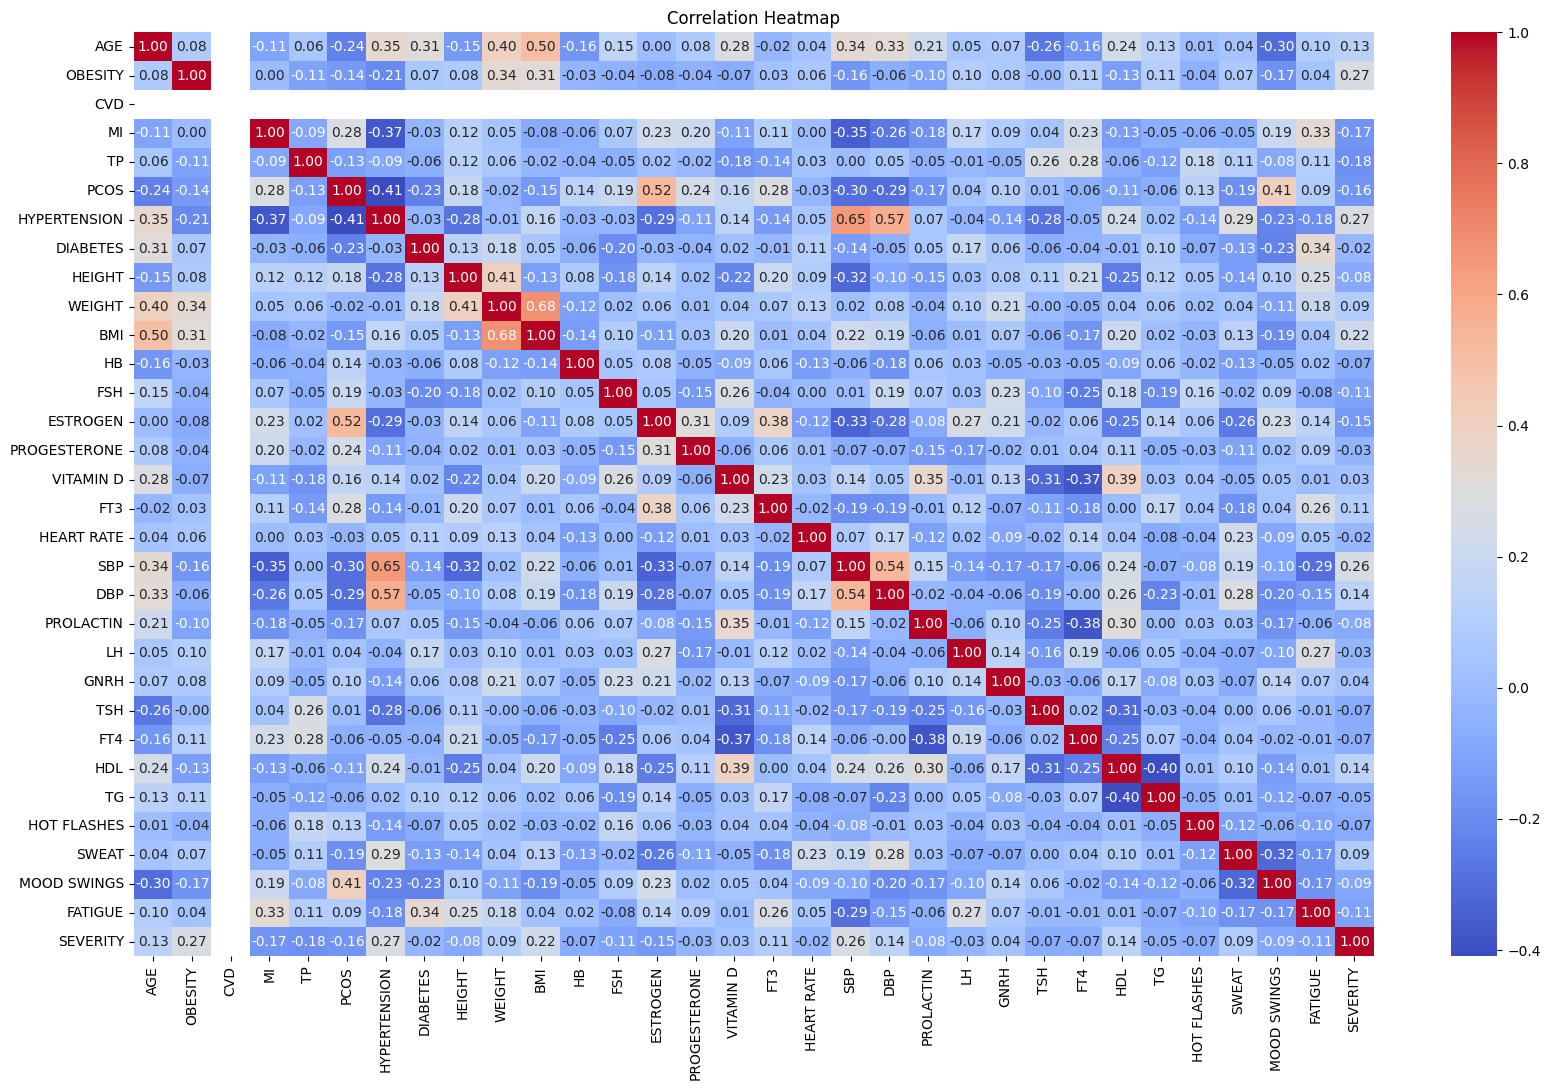

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Create the heatmap
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**MI SCORE**

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
X = cleaned_df.drop(['SEVERITY'], axis=1)
y = cleaned_df['SEVERITY']

mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
features_desc_val = mi_df.sort_values(by='MI Score', ascending=False)
features_desc_val

,Feature,MI Score
18,SBP,0.267802
16,FT3,0.132256
1,OBESITY,0.116382
27,HOT FLASHES,0.097066
21,LH,0.090200
29,MOOD SWINGS,0.088487
20,PROLACTIN,0.087047
10,BMI,0.084776
23,TSH,0.078351
4,TP,0.067434


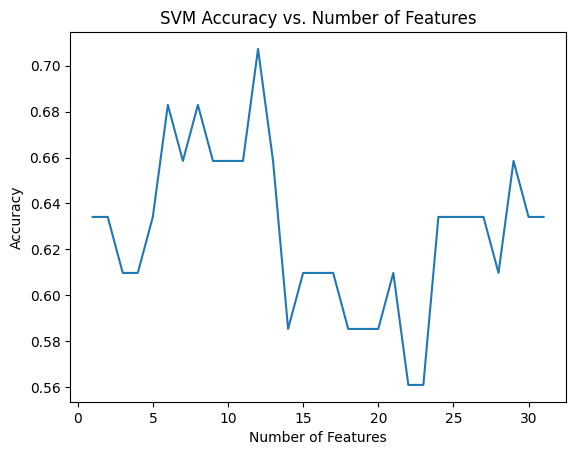

Highest Accuracy: 0.7073170731707317
Number of Features Selected: 12


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate SVM with different feature subsets
def evaluate_svm(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    svm_model = SVC(kernel='linear')  # You can adjust the kernel as needed
    svm_model.fit(X_train_subset, y_train)

    y_pred = svm_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets from 1 to 31
feature_subsets = [features_desc_val['Feature'][0:i] for i in range(1, 32)]

# Evaluate SVM for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_svm(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs. Number of Features")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

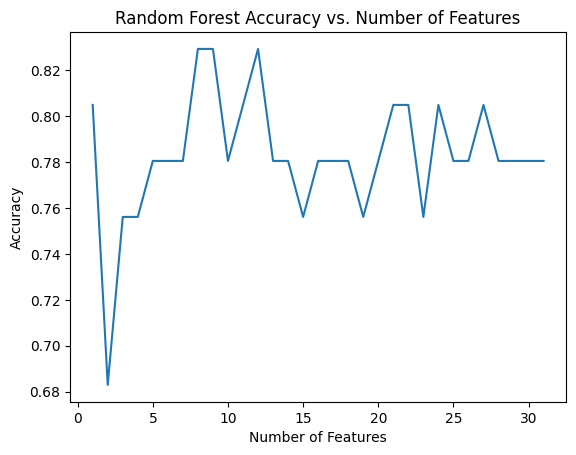

Highest Accuracy: 0.8292682926829268
Number of Features Selected: 8


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_random_forest(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_subset, y_train)

    y_pred = rf_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_val['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_random_forest(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

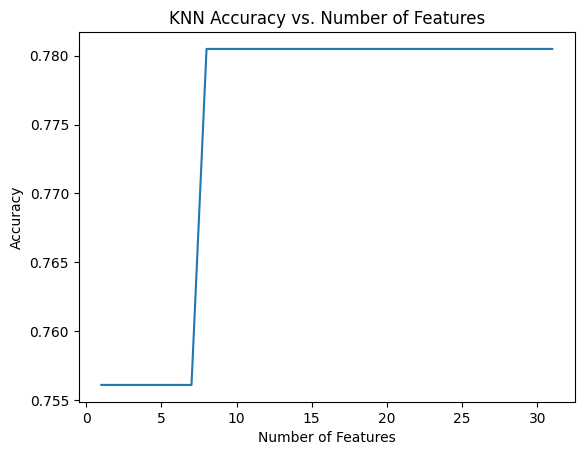

Highest Accuracy: 0.7804878048780488
Number of Features Selected: 8


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def evaluate_knn(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)

    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_val['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_knn(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

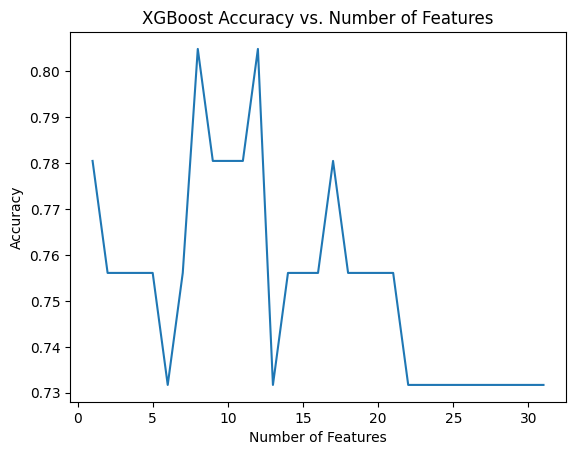

Highest Accuracy: 0.8048780487804879
Number of Features Selected: 8


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def evaluate_xgboost(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train_subset, y_train)

    y_pred = xgb_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_val['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_xgboost(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("XGBoost Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

**F-Statistics**

In [ ]:
from sklearn.feature_selection import f_regression
import pandas as pd

f_statistic, p_values = f_regression(X, y)

f_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Statistic': f_statistic,
    'p-value': p_values
})

features_desc_fstat = f_df.sort_values(by='F-Statistic', ascending=False)
features_desc_fstat['F-Statistic'] = features_desc_fstat['F-Statistic'].round(2)
features_desc_fstat['p-value'] = features_desc_fstat['p-value'].round(3)

print(features_desc_fstat)

         Feature  F-Statistic  p-value
6   HYPERTENSION        10.49    0.002
1        OBESITY        10.14    0.002
18           SBP         9.62    0.002
10           BMI         6.85    0.010
4             TP         4.51    0.035
3             MI         3.80    0.053
5           PCOS         3.67    0.058
13      ESTROGEN         2.90    0.091
19           DBP         2.54    0.113
25           HDL         2.50    0.116
0            AGE         2.36    0.127
30       FATIGUE         1.71    0.193
12           FSH         1.57    0.212
16           FT3         1.57    0.213
9         WEIGHT         1.20    0.276
28         SWEAT         1.10    0.296
29   MOOD SWINGS         0.99    0.322
20     PROLACTIN         0.88    0.350
8         HEIGHT         0.87    0.353
11            HB         0.72    0.397
23           TSH         0.70    0.404
27   HOT FLASHES         0.68    0.412
24           FT4         0.57    0.451
26            TG         0.34    0.562
22          GNRH         

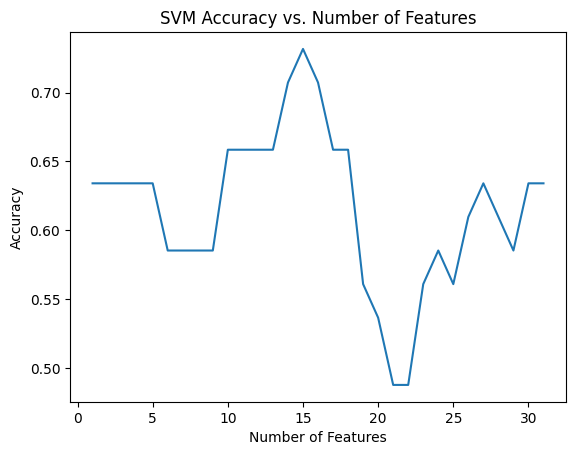

Highest Accuracy: 0.7317073170731707
Number of Features Selected: 15


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_svm(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_subset, y_train)

    y_pred = svm_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_fstat['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_svm(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

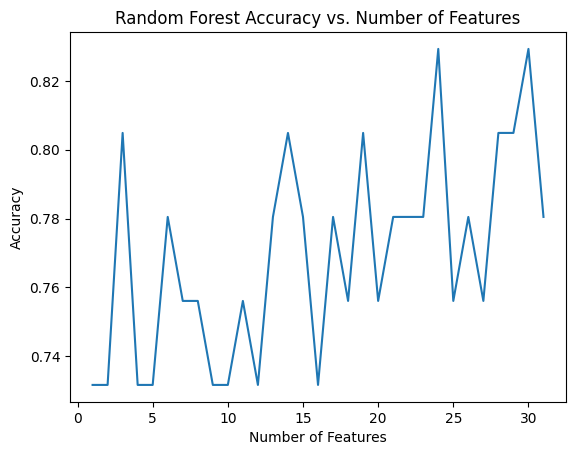

Highest Accuracy: 0.8292682926829268
Number of Features Selected: 24


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def evaluate_random_forest(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_subset, y_train)

    y_pred = rf_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_fstat['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_random_forest(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

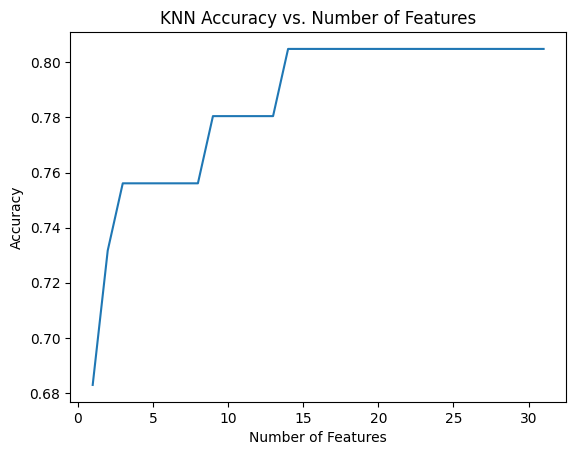

Highest Accuracy: 0.8048780487804879
Number of Features Selected: 14


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def evaluate_knn(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)

    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_fstat['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_knn(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

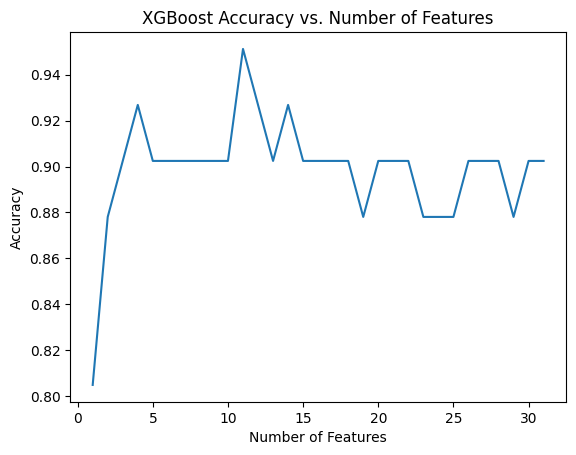

Highest Accuracy: 0.9512195121951219
Number of Features Selected: 11


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def evaluate_xgboost(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train_subset, y_train)

    y_pred = xgb_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = [features_desc_fstat['Feature'][0:i] for i in range(1, 32)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_xgboost(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, 32), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("XGBoost Accuracy vs. Number of Features")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

In [ ]:
import pandas as pd
import numpy as np
X = cleaned_df.drop(['SEVERITY'], axis=1)
y = cleaned_df['SEVERITY']

corr_matrix = X.corrwith(y)

corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation': corr_matrix})

features_desc_corr = corr_df.sort_values(by='Correlation', key=abs, ascending=False)
features_desc_corr['Correlation'] = features_desc_corr['Correlation']

print(features_desc_corr)

                   Feature  Correlation
HYPERTENSION  HYPERTENSION     0.270434
OBESITY            OBESITY     0.266155
SBP                    SBP     0.259674
BMI                    BMI     0.221296
TP                      TP    -0.181170
MI                      MI    -0.166603
PCOS                  PCOS    -0.163769
ESTROGEN          ESTROGEN    -0.146111
DBP                    DBP     0.136860
HDL                    HDL     0.135753
AGE                    AGE     0.131950
FATIGUE            FATIGUE    -0.112624
FSH                    FSH    -0.108178
FT3                    FT3     0.107857
WEIGHT              WEIGHT     0.094414
SWEAT                SWEAT     0.090686
MOOD SWINGS    MOOD SWINGS    -0.085897
PROLACTIN        PROLACTIN    -0.081139
HEIGHT              HEIGHT    -0.080628
HB                      HB    -0.073509
TSH                    TSH    -0.072335
HOT FLASHES    HOT FLASHES    -0.071127
FT4                    FT4    -0.065455
TG                      TG    -0.050330


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


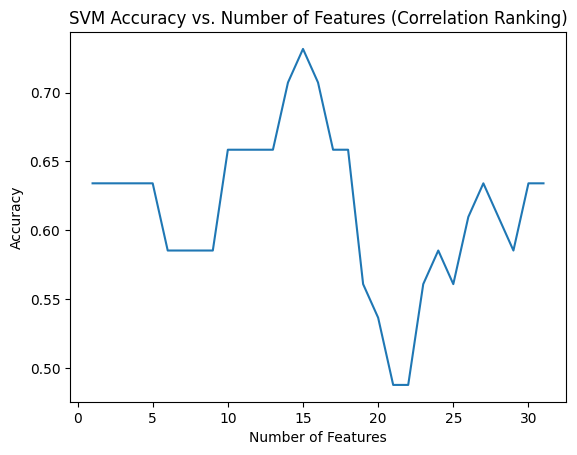

Highest Accuracy: 0.7317073170731707
Number of Features Selected: 15


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Assuming features_desc_corr is the DataFrame with features ranked by correlation
features_to_evaluate = features_desc_corr['Feature'].tolist()
def evaluate_svm(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_subset, y_train)

    y_pred = svm_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets based on ranking
feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

# Evaluate SVM for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_svm(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs. Number of Features (Correlation Ranking)")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

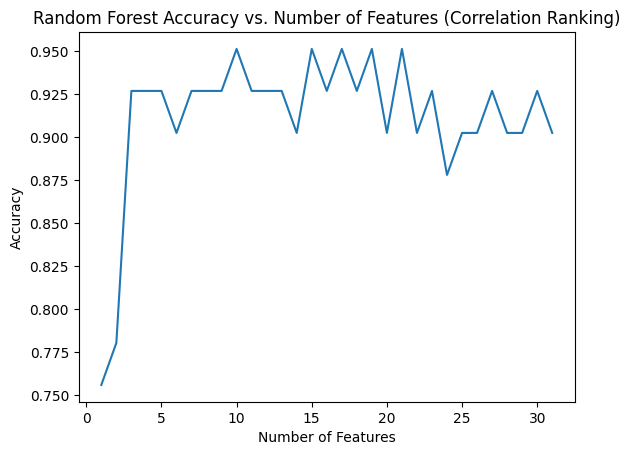

Highest Accuracy: 0.9512195121951219
Number of Features Selected: 10


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Assuming features_desc_corr is the DataFrame with features ranked by correlation
features_to_evaluate = features_desc_corr['Feature'].tolist()  # Extract feature names

# Function to evaluate Random Forest with different feature subsets
def evaluate_random_forest(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_subset, y_train)

    y_pred = rf_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets based on ranking
feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

# Evaluate Random Forest for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_random_forest(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Features (Correlation Ranking)")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

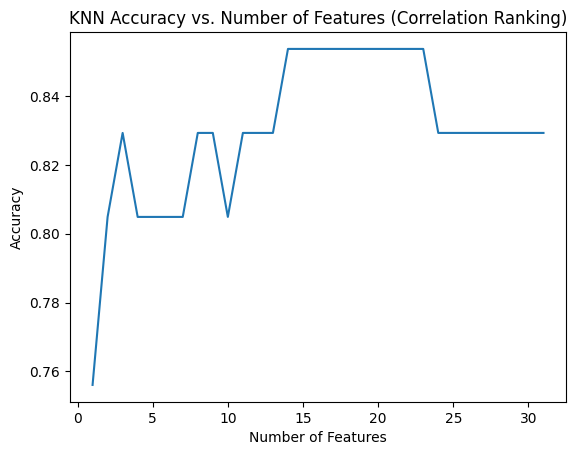

Highest Accuracy: 0.8536585365853658
Number of Features Selected: 14


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Assuming features_desc_corr is the DataFrame with features ranked by correlation
features_to_evaluate = features_desc_corr['Feature'].tolist()  # Extract feature names

# Function to evaluate KNN with different feature subsets
def evaluate_knn(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
    knn_model.fit(X_train_subset, y_train)

    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets based on ranking
feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

# Evaluate KNN for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_knn(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
# Consider mentioning correlation ranking in the title
plt.title("KNN Accuracy vs. Number of Features (Correlation Ranking)")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

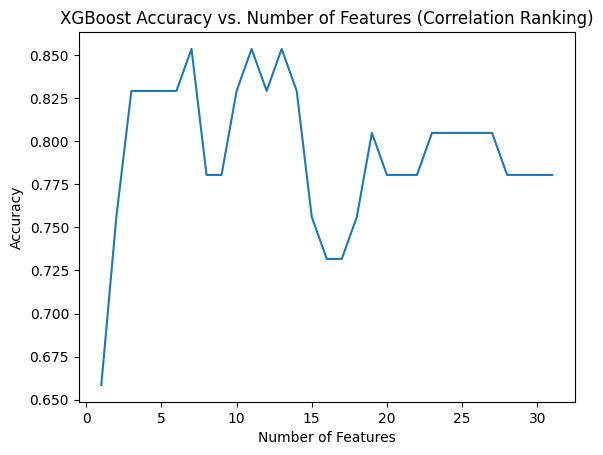

Highest Accuracy: 0.8536585365853658
Number of Features Selected: 7


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Assuming features_desc_corr is the DataFrame with features ranked by correlation
features_to_evaluate = features_desc_corr['Feature'].tolist()  # Extract feature names

# Function to evaluate XGBoost with different feature subsets
def evaluate_xgboost(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    xgb_model = XGBClassifier()
    xgb_model.fit(X_train_subset, y_train)

    y_pred = xgb_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets based on ranking
feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

# Evaluate XGBoost for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_xgboost(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
# Consider mentioning correlation ranking in the title
plt.title("XGBoost Accuracy vs. Number of Features (Correlation Ranking)")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2

# Assuming X is your feature matrix (categorical) and y is your categorical target variable

# Calculate Chi-Squared statistic and p-values
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to store the results
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi2_scores, 'p-value': p_values})

# Sort by Chi-Squared score in descending order
features_desc_chi2 = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)
features_desc_chi2['Chi-Squared Score'] = features_desc_chi2['Chi-Squared Score'].round(2)
features_desc_chi2['p-value'] = features_desc_chi2['p-value'].round(3)

print(features_desc_chi2)

         Feature  Chi-Squared Score  p-value
13      ESTROGEN             573.64    0.000
16           FT3             193.33    0.000
21            LH              82.09    0.000
22          GNRH              53.43    0.000
18           SBP              32.54    0.000
25           HDL              17.08    0.000
11            HB              14.23    0.001
1        OBESITY              11.18    0.004
24           FT4               9.86    0.007
7       DIABETES               9.26    0.010
0            AGE               7.35    0.025
20     PROLACTIN               7.07    0.029
5           PCOS               5.52    0.063
4             TP               4.70    0.095
6   HYPERTENSION               4.44    0.109
26            TG               3.96    0.138
3             MI               3.94    0.140
19           DBP               3.87    0.144
12           FSH               3.69    0.158
10           BMI               3.12    0.210
8         HEIGHT               2.79    0.248
30       F

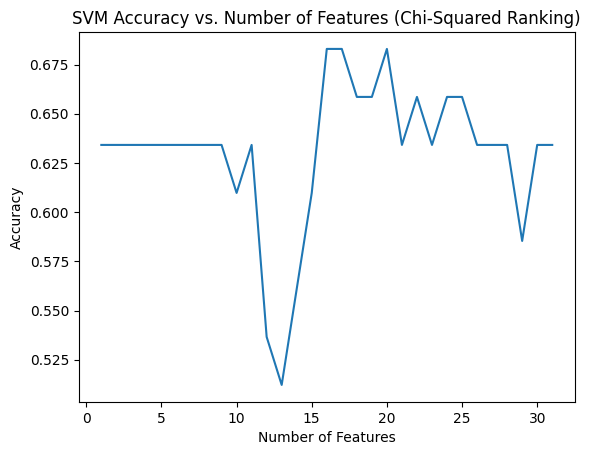

Highest Accuracy: 0.6829268292682927
Number of Features Selected: 16


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets (set random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Assuming X is categorical (necessary for chi2)
# Calculate Chi-Squared statistic and p-values
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to store the results
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi2_scores, 'p-value': p_values})

# Sort by Chi-Squared score in descending order
features_desc_chi2 = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)

# Extract feature names based on Chi2 ranking
features_to_evaluate = features_desc_chi2['Feature'].tolist()


def evaluate_svm(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    svm_model = SVC(kernel='linear')  # Use linear kernel for compatibility with chi2
    svm_model.fit(X_train_subset, y_train)

    y_pred = svm_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


# Create a list of feature subsets based on Chi2 ranking (adjust range as needed)
feature_subsets = [features_to_evaluate[:i] for i in range(1, len(features_to_evaluate) + 1)]

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_svm(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs. Number of Features (Chi-Squared Ranking)")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

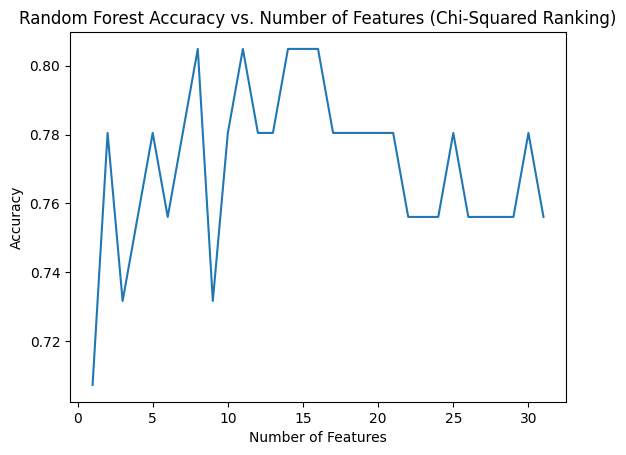

Highest Accuracy: 0.8048780487804879
Number of Features Selected: 8


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Assuming X is categorical (necessary for chi2)
# Calculate Chi-Squared statistic and p-values
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to store the results
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi2_scores, 'p-value': p_values})

# Sort by Chi-Squared score in descending order
features_desc_chi2 = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)

# Extract feature names based on Chi2 ranking
features_to_evaluate = features_desc_chi2['Feature'].tolist()

# Function to evaluate Random Forest with different feature subsets
def evaluate_random_forest(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    rf_model = RandomForestClassifier(random_state=42)  # Set random state for reproducibility
    rf_model.fit(X_train_subset, y_train)

    y_pred = rf_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets based on Chi2 ranking
feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

# Evaluate Random Forest for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_random_forest(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Features (Chi-Squared Ranking)")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

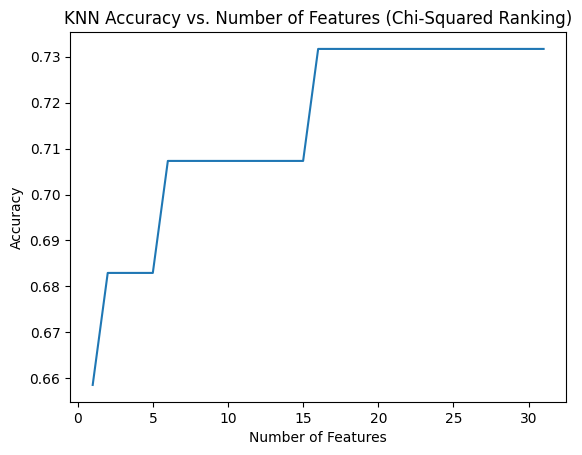

Highest Accuracy: 0.7317073170731707
Number of Features Selected: 16


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Assuming X is categorical (necessary for chi2)
# Calculate Chi-Squared statistic and p-values
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to store the results
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi2_scores, 'p-value': p_values})

# Sort by Chi-Squared score in descending order
features_desc_chi2 = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)

# Extract feature names based on Chi2 ranking
features_to_evaluate = features_desc_chi2['Feature'].tolist()

# Function to evaluate KNN with different feature subsets
def evaluate_knn(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
    knn_model.fit(X_train_subset, y_train)

    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a list of feature subsets based on Chi2 ranking
feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

# Evaluate KNN for each feature subset and store results
accuracies = []
for features in feature_subsets:
    accuracy = evaluate_knn(features)
    accuracies.append(accuracy)

# Find the feature subset with the highest accuracy
best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1  # Add 1 to get the actual number of features

# Plot the accuracy vs. number of features
plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Features (Chi-Squared Ranking)")
plt.show()

# Print the highest accuracy and number of features
print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

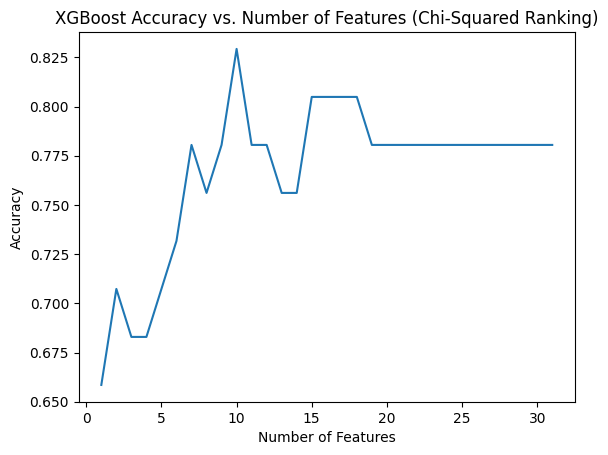

Highest Accuracy: 0.8292682926829268
Number of Features Selected: 10


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

chi2_scores, p_values = chi2(X, y)

chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi2_scores, 'p-value': p_values})

features_desc_chi2 = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)

features_to_evaluate = features_desc_chi2['Feature'].tolist()

def evaluate_xgboost(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    xgb_model = XGBClassifier()
    xgb_model.fit(X_train_subset, y_train)

    y_pred = xgb_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

feature_subsets = []
for i in range(1, len(features_to_evaluate) + 1):
    feature_subsets.append(features_to_evaluate[:i])

accuracies = []
for features in feature_subsets:
    accuracy = evaluate_xgboost(features)
    accuracies.append(accuracy)

best_accuracy = max(accuracies)
best_num_features = accuracies.index(best_accuracy) + 1

plt.plot(range(1, len(features_to_evaluate) + 1), accuracies)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("XGBoost Accuracy vs. Number of Features (Chi-Squared Ranking)")
plt.show()

print("Highest Accuracy:", best_accuracy)
print("Number of Features Selected:", best_num_features)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


selected_features = ['HYPERTENSION', 'OBESITY', 'SBP', 'BMI', 'TP', 'MI', 'PCOS', 'ESTROGEN', 'DBP', 'HDL', 'AGE']
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

SVM Accuracy: 0.6341463414634146
KNN Accuracy: 0.8292682926829268
Random Forest Accuracy: 0.8048780487804879


In [ ]:
y = cleaned_df['SEVERITY']

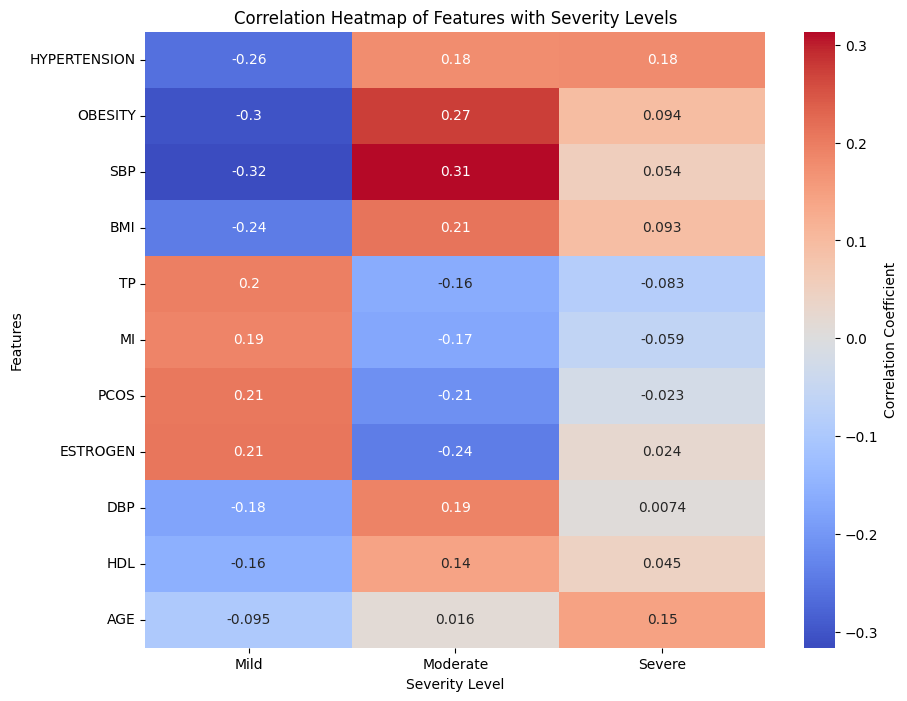

In [ ]:
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

features = ['HYPERTENSION', 'OBESITY', 'SBP', 'BMI', 'TP', 'MI', 'PCOS', 'ESTROGEN', 'DBP', 'HDL', 'AGE']
severity_labels = ['Mild', 'Moderate', 'Severe']
severity_levels = [0, 1, 2]
correlations = pd.DataFrame(index=features, columns=severity_labels)

for feature in features:
    for level, label in zip(severity_levels, severity_labels):
        level_data = data[y == level][feature]
        correlations.at[feature, label] = pointbiserialr((y == level).astype(int), data[feature])[0]

correlations = correlations.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap of Features with Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Features")
plt.show()
'''


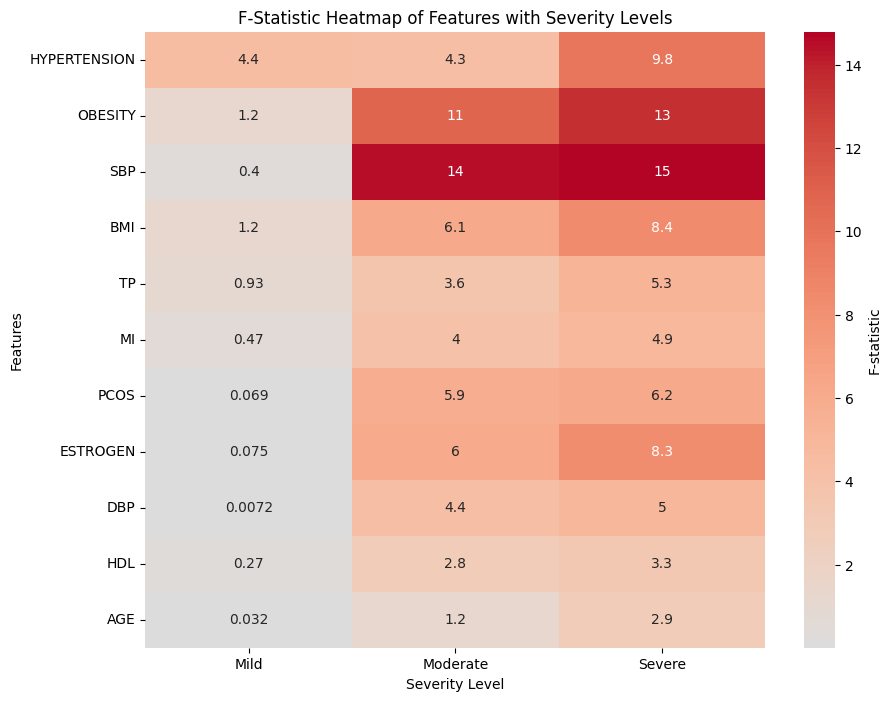

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

features = ['HYPERTENSION', 'OBESITY', 'SBP', 'BMI', 'TP', 'MI', 'PCOS', 'ESTROGEN', 'DBP', 'HDL', 'AGE']
severity_labels = ['Mild', 'Moderate', 'Severe']
severity_levels = [0, 1, 2]

f_statistics = pd.DataFrame(index=features, columns=severity_labels)

for feature in features:
    for level, label in zip(severity_levels, severity_labels):
        group_1 = cleaned_df[y == level][feature]    # Data for current severity level
        group_2 = cleaned_df[y != level][feature]    # Data for all other levels

        f_stat, p_val = f_oneway(group_1, group_2)

        f_statistics.at[feature, label] = f_stat

f_statistics = f_statistics.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(f_statistics, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'F-statistic'})
plt.title("F-Statistic Heatmap of Features with Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Features")
plt.show()
